# Bird IRL

Inverse reinforcement Learning for simulating seabirds' foraging trips

In [1]:
# import python libraries
import sqlite3
import pandas as pd
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

# import home-made scripts
from grid import Grid
from mdp import MDP
from maxentirl import MaxEntIRL

## Load trajectories

Connection to the database, load and format trajectories to the grid of study

In [2]:
conn = sqlite3.connect('/home/amdroy/MEGA/DATA/seabirdbank.db')

request = "SELECT DISTINCT  bird.id as bird, trip.id as trip, gps.datetime, gps.lon, gps.lat FROM gps \
INNER JOIN trip ON gps.trip = trip.id \
INNER JOIN bird ON trip.bird = bird.id \
WHERE bird.fieldwork = 'P1108' \
AND bird.species = 'SV' \
AND bird.sex = 'M'"

df = pd.read_sql_query(request, conn)
df = df.set_index("trip", drop = False)
df.head()

,bird,trip,datetime,lon,lat
trip,,,,,
P1108_2_SV_T1,P1108_2_SV,P1108_2_SV_T1,2008-11-24 16:38:11,-77.264312,-11.773676
P1108_2_SV_T1,P1108_2_SV,P1108_2_SV_T1,2008-11-24 16:38:13,-77.264359,-11.773425
P1108_2_SV_T1,P1108_2_SV,P1108_2_SV_T1,2008-11-24 16:38:15,-77.264492,-11.773189
P1108_2_SV_T1,P1108_2_SV,P1108_2_SV_T1,2008-11-24 16:38:17,-77.264692,-11.773028
P1108_2_SV_T1,P1108_2_SV,P1108_2_SV_T1,2008-11-24 16:38:19,-77.264919,-11.772915


In [3]:
bbox = np.array([ [df['lon'].min(), df['lon'].max()], [df['lat'].min(), df['lat'].max()]])
bbox

array([[-77.825636, -77.181269],
       [-12.042405, -11.382634]])

In [4]:
grid = Grid(np.arange(-78, -77, 0.3), np.arange(-12.1, -11.1, 0.3))

In [5]:
for name in np.unique(df.index.values):
    time = df.loc[name,"datetime"].values
    traj = df.loc[name,"lon":"lat"].values

    grid.add_trajectory(time, traj, name)

Adding trajectory P1108_14_SV_T1 : ok
Adding trajectory P1108_14_SV_T2 : ok
Adding trajectory P1108_14_SV_T3 : ok
Adding trajectory P1108_19_SV_T2 : ok
Adding trajectory P1108_20_SV_T3 : ok
Adding trajectory P1108_20_SV_T4 : ok
Adding trajectory P1108_25_SV_T1 : ok
Adding trajectory P1108_25_SV_T3 : ok
Adding trajectory P1108_25_SV_T4 : ok
Adding trajectory P1108_29_SV_T2 : ok
Adding trajectory P1108_29_SV_T4 : ok
Adding trajectory P1108_30_SV_T1 : ok
Adding trajectory P1108_30_SV_T2 : ok
Adding trajectory P1108_30_SV_T3 : ok
Adding trajectory P1108_33_SV_T1 : ok
Adding trajectory P1108_34_SV_T2 : ok
Adding trajectory P1108_42_SV_T3 : ok
Adding trajectory P1108_43_SV_T1 : ok
Adding trajectory P1108_43_SV_T2 : ok
Adding trajectory P1108_43_SV_T4 : ok
Adding trajectory P1108_43_SV_T8 : ok
Adding trajectory P1108_46_SV_T1 : ok
Adding trajectory P1108_46_SV_T3 : ok
Adding trajectory P1108_48_SV_T1 : ok
Adding trajectory P1108_48_SV_T2 : ok
Adding trajectory P1108_48_SV_T3 : ok
Adding traje

In [6]:
grid.create_gif_trajectory('./trajectory')

### Animated Trajectory

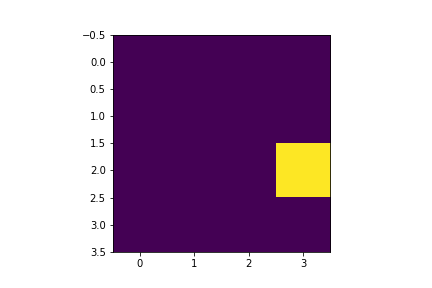

In [8]:
import IPython.display as dp
with open('./trajectory/P1108_12_SV_T1/P1108_12_SV_T1_4x4.gif','rb') as file:
    dp.display(dp.Image(file.read()))

# with open('./trajectory/P1108_33_SV_T2/P1108_33_SV_T2_10x10.gif','rb') as file:
#     dp.display(dp.Image(file.read()))

### Density of all trajectories

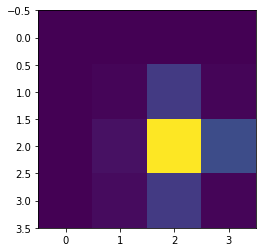

In [9]:
plt.imshow(grid.show_trajectory_density_all())
plt.show()

## Load features map

load and format netCDF to the grid of study

In [10]:
import pickle

In [11]:
# import specific Map -------------------------
with open('./feature/bathy', 'rb') as f:
    data = pickle.load(f)
    lon = pickle.load(f)
    lat = pickle.load(f)
grid.add_feature(lon, lat, data, 'bathy')

with open('./feature/chlorophyll', 'rb') as f:
    data = pickle.load(f)
    lon = pickle.load(f)
    lat = pickle.load(f)
grid.add_feature(lon, lat, data, 'chlorophyll')

with open('./feature/dist_to_coast', 'rb') as f:
    data = pickle.load(f)
    lon = pickle.load(f)
    lat = pickle.load(f)
grid.add_feature(lon, lat, -np.log(data), 'dist_to_coast')

with open('./feature/dist_to_colony', 'rb') as f:
    data = pickle.load(f)
    lon = pickle.load(f)
    lat = pickle.load(f)
grid.add_feature(lon, lat, -np.log(data), 'dist_to_colony')

with open('./feature/landmask', 'rb') as f:
    data = pickle.load(f)
    lon = pickle.load(f)
    lat = pickle.load(f)
grid.add_feature(lon, lat, -data, 'landmask')

# with open('./feature/temperature', 'rb') as f:
#     data = pickle.load(f)
#     lon = pickle.load(f)
#     lat = pickle.load(f)
# grid.add_feature(lon, lat, data, 'temperature')

# with open('./feature/wind_dir', 'rb') as f:
#     data = pickle.load(f)
#     lon = pickle.load(f)
#     lat = pickle.load(f)
# grid.add_feature(lon, lat, data, 'wind_dir')

# with open('./feature/wind_speed', 'rb') as f:
#     data = pickle.load(f)
#     lon = pickle.load(f)
#     lat = pickle.load(f)
# grid.add_feature(lon, lat, data, 'wind_speed')

grid.add_feature(lon, lat, data*0, 'constant')

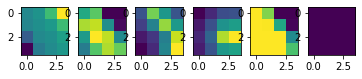

In [12]:
grid.normalize_feature()
grid.show_feature_all()

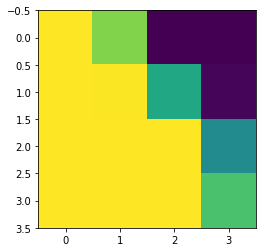

In [13]:
grid.show_feature('landmask')

## Create MDP

In [14]:
length_max = max([len(traj) for _,traj in grid.trajs.items()])
start_end_pos = [traj[-1] for _,traj in grid.trajs.items()][0]

mdp = MDP(length_max, len(grid.lat), len(grid.lon), start_end_pos)
            
P = mdp.get_transition_mat()
feat_map = mdp.get_feature_mat(grid.feature)
trajs = mdp.get_trajs_idx(grid.trajs)

In [18]:
trajs

[[10, 27, 42, 59, 74, 94, 106],
 [74, 86, 106],
 [74, 86, 106],
 [74, 91, 106],
 [74, 86, 106],
 [74, 91, 106],
 [42, 59, 79, 94, 106],
 [74, 94, 106],
 [10, 27, 42, 62, 77, 94, 106],
 [74, 94, 106],
 [74, 86, 106],
 [74, 94, 106],
 [74, 91, 106],
 [74, 91, 106],
 [74, 86, 106],
 [74, 86, 106],
 [74, 86, 106],
 [74, 94, 106],
 [74, 91, 106],
 [74, 86, 106],
 [42, 57, 69, 86, 106],
 [74, 94, 106],
 [42, 62, 77, 89, 106],
 [74, 91, 106],
 [74, 89, 106],
 [42, 59, 71, 86, 106],
 [10, 27, 42, 59, 74, 91, 106],
 [74, 86, 106],
 [74, 91, 106],
 [74, 94, 106]]

## Run MaxEntIRL

In [ ]:
model = MaxEntIRL(P, feat_map, trajs)

In [ ]:
model.maxent_irl(1, 0.01, 10)

In [ ]:
with open('maxent_irl', 'wb') as f:
    pickle.dump(model,f)

### Final Reward Map

In [ ]:
rewards_grid = mdp.get_rewards_grid(model.rewards)

for i in range(mdp.length_max):
    plt.imshow(rewards_grid[i,:,:])
    plt.show()

In [ ]:
svf_grid = model.svf.reshape((mdp.length_max, mdp.height, mdp.width))

for i in range(mdp.length_max):
    plt.imshow(svf_grid[i,:,:])
    plt.show()

In [ ]:
model.svf

### Simulated Trajectories

In [ ]:
mdp.start

In [ ]:
traj_sim = mdp.generate_demonstrations(model.policy, (0,2,2), n_trajs=10, len_traj=mdp.length_max)
traj_sim

In [ ]:
import os
import imageio

def create_gif_simulations(path, traj_sim):
    for i in range(len(traj_sim)):
        name = str(i)
        # test if folder exist, else create it
        if not os.path.isdir(path+'/'+name):
            os.mkdir(path+'/'+name)
        if not os.path.isdir(path+'/'+name+'/step'):
            os.mkdir(path+'/'+name+'/step')

        images = []
        n = 0
        m = np.zeros(grid.size)
        # loop over each position and save associated image
        for step in traj_sim[i]:
            m = m/2
            coord = mdp.idx2state(step)
            m[coord[1], coord[2]] += 1
            
            path_im = path+'/'+name+'/step/'+name+'_'+str(grid.width)+'x'+ str(grid.width)+'_'+str(n)
            # Create a new figure, plot into it, then close it so it never gets displayed
            fig = plt.figure()
            plt.imshow(m)
            plt.savefig(path_im)
            plt.close(fig)
            images.append(imageio.imread(path_im+'.png'))
            n+=1
        # save gif
        path_gif = path+'/'+name+'/'+name+'_'+str(grid.width)+'x'+ str(grid.width)+'.gif'
        imageio.mimsave(path_gif, images)

In [ ]:
create_gif_simulations('./simulations/', traj_sim)

In [ ]:
with open('./simulations/4/4_4x4.gif','rb') as file:
    dp.display(dp.Image(file.read()))

# with open('./trajectory/P1108_33_SV_T2/P1108_33_SV_T2_10x10.gif','rb') as file:
#     dp.display(dp.Image(file.read()))

### Density of simulated Trajectories

In [ ]:
freq = np.zeros(grid.size)
n = 1
for traj in traj_sim:
    im = np.zeros(grid.size)
    for idx in traj:
        state = mdp.idx2state(idx)
        im[state[1], state[2]] += 1
        
    # new_plt
    plt.imshow(im)
    plt.savefig('./simulations/'+str(n))
        
    freq += im
    n += 1
    
plt.imshow(freq)

### Theta Evolution

In [ ]:
theta = model.theta.reshape(len(grid.feature), mdp.length_max)
labels = [t for t in grid.feature.keys()]

for t in range(len(grid.feature)):
    plt.plot(np.log(theta[t,:]), label = labels[t])

plt.legend(loc="upper left")

In [ ]:
model.theta